In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("DataSet/housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split
# x is data frame without target variable
x = data.drop(['median_house_value'], axis = 1)
# y is target variable
y = data['median_house_value']


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
train_data = x_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9676,-119.02,37.64,14.0,5919.0,1278.0,265.0,112.0,3.2431,INLAND,221400.0
6015,-117.79,34.07,34.0,975.0,192.0,870.0,183.0,3.7933,INLAND,116100.0
13556,-117.31,34.10,28.0,2899.0,755.0,2406.0,655.0,1.5208,INLAND,69500.0
1076,-121.80,39.75,11.0,7212.0,1355.0,3264.0,1264.0,3.1125,INLAND,122600.0
15326,-117.33,33.19,15.0,3672.0,845.0,1827.0,796.0,2.9716,NEAR OCEAN,173600.0
...,...,...,...,...,...,...,...,...,...,...
9688,-121.64,36.70,32.0,4089.0,735.0,2927.0,713.0,4.1675,<1H OCEAN,142500.0
18476,-121.66,37.11,19.0,3785.0,611.0,2198.0,610.0,5.1514,<1H OCEAN,436700.0
11566,-118.02,33.77,34.0,2115.0,352.0,1253.0,338.0,5.1507,<1H OCEAN,207500.0
17721,-121.79,37.33,13.0,2978.0,505.0,1794.0,485.0,6.6813,<1H OCEAN,277800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

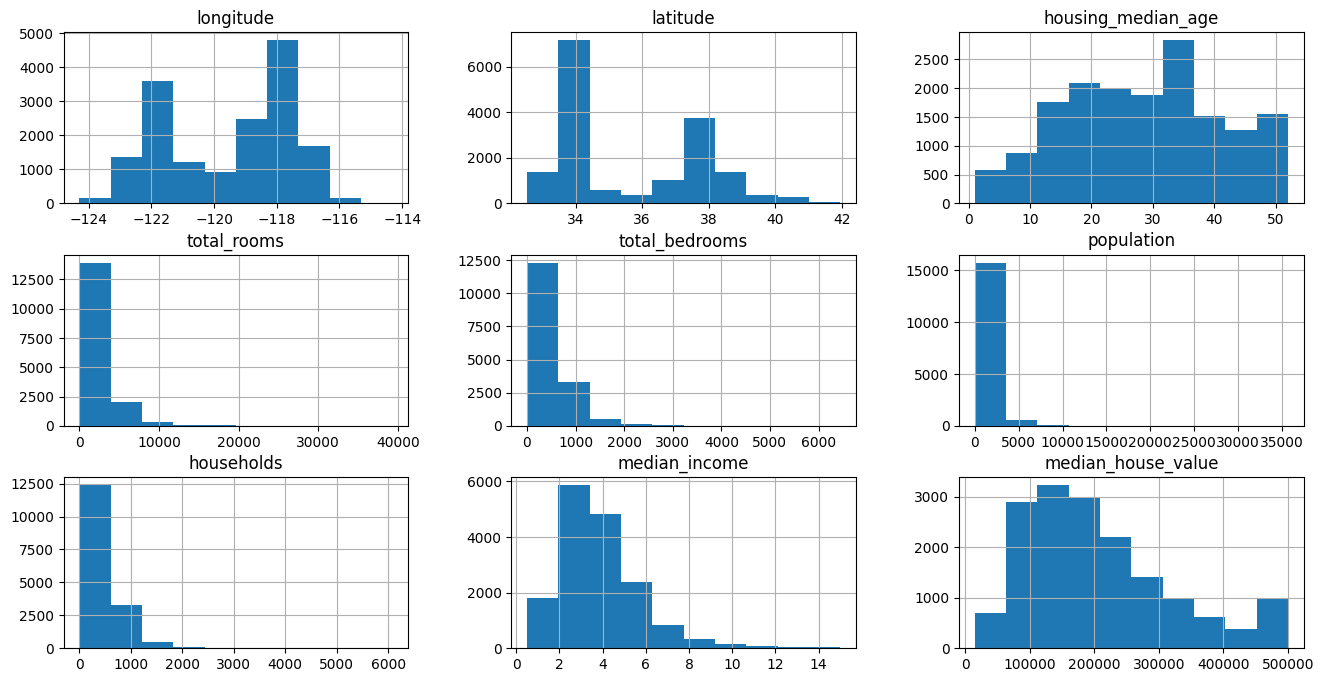

In [12]:
train_data.hist(figsize=(16,8))

In [13]:
train_data.corr()

C:\Users\fargi\AppData\Local\Temp\ipykernel_7744\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923989,-0.105164,0.044539,0.068114,0.098085,0.055243,-0.018086,-0.047625
latitude,-0.923989,1.000000,0.007672,-0.035491,-0.064996,-0.106441,-0.070025,-0.078987,-0.144842
housing_median_age,-0.105164,0.007672,1.000000,-0.357375,-0.317238,-0.292188,-0.298879,-0.116776,0.106527
total_rooms,0.044539,-0.035491,-0.357375,1.000000,0.931909,0.857210,0.920296,0.196943,0.131075
total_bedrooms,0.068114,-0.064996,-0.317238,0.931909,1.000000,0.878877,0.980346,-0.006643,0.047901
population,0.098085,-0.106441,-0.292188,0.857210,0.878877,1.000000,0.907309,0.004536,-0.025823
households,0.055243,-0.070025,-0.298879,0.920296,0.980346,0.907309,1.000000,0.013819,0.062693
median_income,-0.018086,-0.078987,-0.116776,0.196943,-0.006643,0.004536,0.013819,1.000000,0.686913
median_house_value,-0.047625,-0.144842,0.106527,0.131075,0.047901,-0.025823,0.062693,0.686913,1.000000


C:\Users\fargi\AppData\Local\Temp\ipykernel_7744\3346828142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

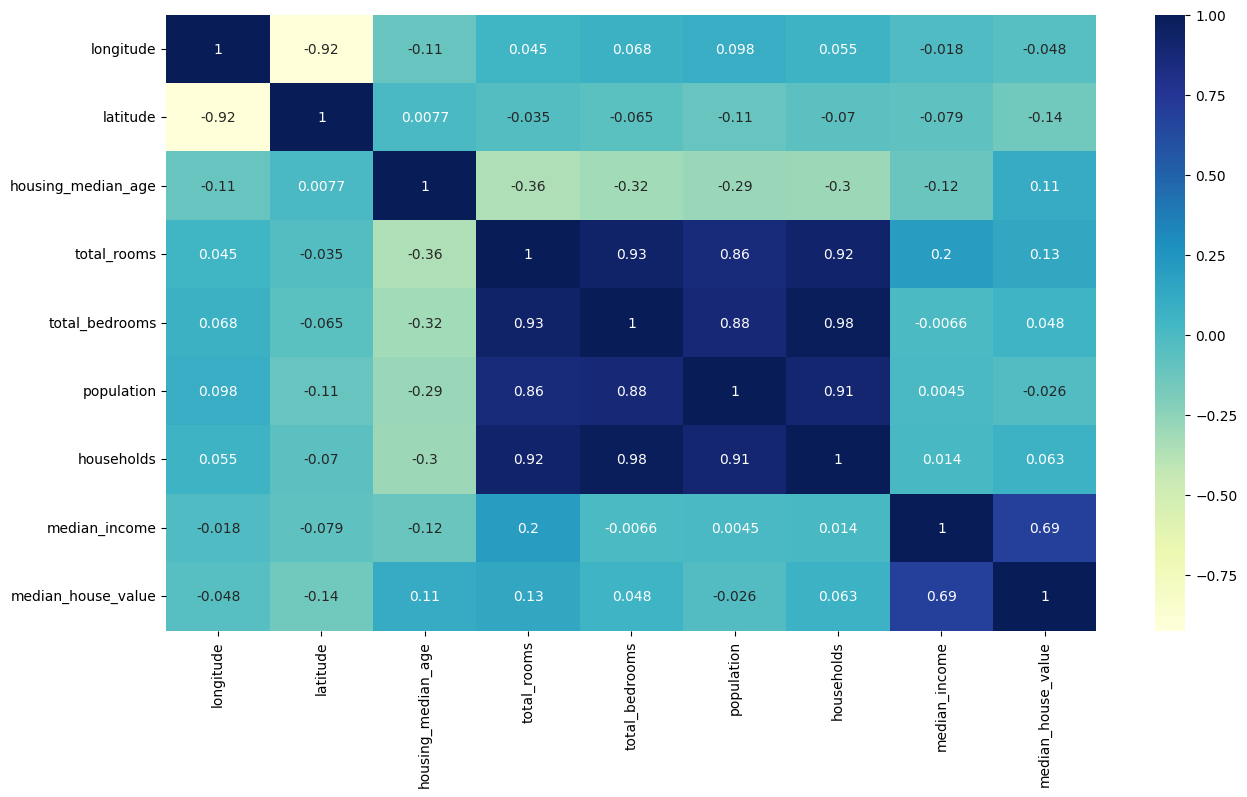

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")